In [115]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt

import musclebeachtools as mbt
from braingeneers import neuron
import glob
import sys

from scipy.ndimage import gaussian_filter1d

In [6]:
sys.modules['musclebeachtools_hlab'] = sys.modules['musclebeachtools']
sys.modules['musclebeachtools_hlab.musclebeachtools'] = sys.modules['musclebeachtools']

In [195]:
def get_well(chs):
    '''chs -- file list in the results folder of the axion data output'''
    # Sort
    chs = sorted(chs)

    # Remove rasters 
    chs = [ch for ch in chs if 'rasters' not in ch]

    well_dict = {}
    seen_ch = []

    for ch in chs:

        well_grp = ch.split('/')[-1]
#         print(well_grp)
        well, grp = well_grp.split('chgroup')
#         print(well,grp)

        #Maps group to full name
        temp = {well+grp:ch}

        if well not in seen_ch:
            seen_ch.append(well)
            well_dict[well] = {}

        well_dict[well][int(grp)] = ch


    return well_dict

def shorten_all_fs(nd,fs):
    min_time = min([i.shape[1] for i in nd])
    cut_amount = int(min_time%fs)
    cut_ind = min_time - cut_amount
    
    return np.vstack([i[:,:cut_ind] for i in nd])

def shorten_fs(nd,fs):
    cut_amount = int(nd.shape[1]%fs)
    cut_ind = nd.shape[1] - cut_amount
    
    return nd[:,:cut_ind]


def get_well_data(well_dict,stim_period=None):
    '''Passes in a diction of the well groups returned by get_well()
    This looks like get_data_well(well_dict['A1'])
    returns np arr
    stim_period is how the data can be split over a 3rd dim, cutting the time into chunks of
    {stim_period} seconds
    Output then is (n,k,t) - neurons, stims, stim_period'''
    arrs = []
    neu = []
    n = neuron.Neuron('temp')
    fs = 0
    for pref in well_dict.values():
    
        #Load file
        nf = glob.glob(pref + '/spikeintf/outputs/neurons*')
        data = np.load(nf[0],allow_pickle=True)
        fs = data[0].fs

        #Make dense
        spike_list = [data[i].spike_time for i in range(len(data))]
        arrs.append(n.load_spike_times(spike_list,max_neurons=100))
        
        af = glob.glob(pref + '/spikeintf/outputs/amplitudes0*')
        data = mbt.load_spike_amplitudes(data, af[0])

        neu = neu + list(data)
#         print('Nick',len(arrs),len(neu))
        
        #Shorten data to shortest of them all
    data = shorten_all_fs(arrs,fs)
    
    
    if stim_period is not None:
        #Make data fit under multiple of stim_periods
        data = shorten_fs(data,stim_period)
        data = data.reshape((data.shape[0],data.shape[1]//stim_period,stim_period))
    return (data,fs,neu)

## Load in spike times from experiment

In [439]:
#List possible experiments
chs = glob.glob("/Users/seymour/research/braingeneers/ephys/root/data/2020-12-01-e-MGK-primary-axion-stim-500mV-20sec/results/*")
well_dict = get_well(chs)

nf = glob.glob(well_dict['A1'][1] + '/spikeintf/outputs/neurons*')
data = np.load(nf[0],allow_pickle=True)
fs = data[0].fs


In [440]:
stim_period = int(20*fs) #in seconds
n = neuron.Neuron('temp')

data,fs,neu = get_well_data(well_dict['A1'],stim_period)

2020-12-09 13:55:24,171 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,197 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,235 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,268 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,293 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,321 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,345 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,362 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,371 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,380 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude


15 10
9 9
10 10
11 10
12 10
11 10
11 10
15 10
13 10


2020-12-09 13:55:24,391 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,412 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,439 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,463 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude
2020-12-09 13:55:24,489 - musclebeachtools.mbt_neurons - INFO - Updating spike_amplitude


13 10
14 10
9 9
9 9
13 10
11 10
176 176


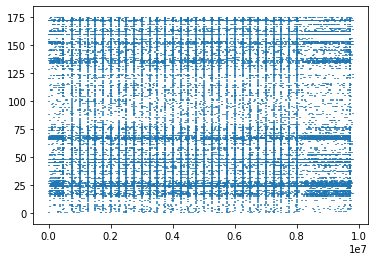

In [449]:
plt.eventplot([i.spike_time for i in neu])

# Lets browse through and filter out good ones by hand....

In [132]:
%matplotlib inline

In [137]:
for i in range(len(neu)):
#     print(neu[i])
    pass
print(len(neu))
# neu[0].__dict__

176


In [138]:

neu[0].__dict__.keys()

dict_keys(['clust_idx', 'spike_time', 'quality', 'waveform', 'waveforms', 'peak_channel', 'fs', 'start_time', 'end_time', 'waveform_tetrodes', 'on_times', 'off_times', 'key', 'qual_prob', 'cell_type', 'mean_amplitude', 'spike_amplitude'])

2020-12-09 14:06:54,966 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Plotting figures for checking quality
2020-12-09 14:06:55,044 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Calculating ISI
/Users/seymour/miniconda3/envs/bgr/lib/python3.8/site-packages/musclebeachtools/mbt_neurons.py:951: RuntimeWarning: invalid value encountered in long_scalars
  contamination = 100*(sum(hist_isi[0][0:int((0.1/isi_thresh) *
2020-12-09 14:06:55,045 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Contamination is nan percent.
2020-12-09 14:06:55,089 - musclebeachtools_hlab.musclebeachtools.mbt_neurons - INFO - Total FR is 0.038192
/Users/seymour/miniconda3/envs/bgr/lib/python3.8/site-packages/musclebeachtools/mbt_neurons.py:1890: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  fr_ax.set_xticks([], [])
/Users/seymour

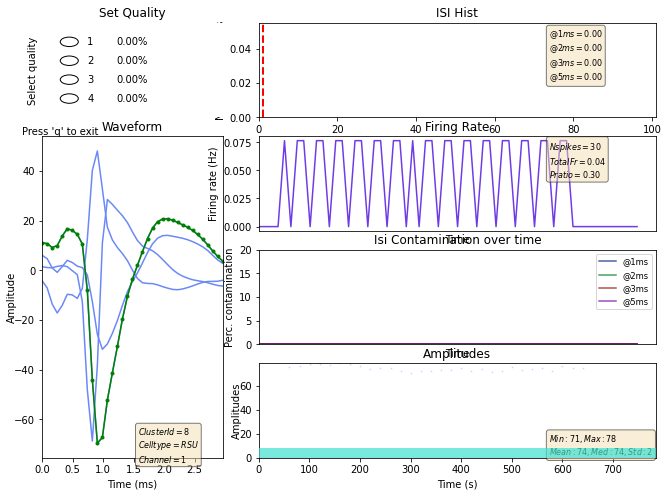

In [473]:
for i in range(len(neu)):
    neu[i].qual_prob = np.zeros((4,))
#     print(i)
#     neu[i].checkqual()
neu[102].checkqual(binsz=200)
# q_arr = [3,3,1,3,2,3,2,3,1,1,3,3,1,1,4,2,2,2,2,2,3,3,2,2,2,2,2,2,2]
# print(len(q_arr))

In [172]:
#I hate this please someone help
q_arr = [3,3,1,3,2,3,2,3,1,1,3,3,1,1,4,2,2,2,2,2,3,3,2,2,2,2,2,2,2
        ,2,3,2,2,3,2,2,4,2,2,3,2,2,2,2,3,2,2,1,2,2,2,2,2,2,2,2,2,2,1,2,2,1,1,1,2,2,1,2,2,2,3,2,2,3,2,2,2,2,3,3,
        1,2,3,2,1,2,1,3,1,2,3,2,2,3,2,2,3,2,2,4,2,2,4,4,2,1,3,2,1,2,3,1,2,2,1,3,2,3,2,2,2,2,2,1,3,1,1,3,2,2,3,2,2,2,2,2,2,
        3,2,2,2,2,2,2,1,2,2,1,2,2,2,2,2,2,1,2,1,1,2,1,1,1,1,1,1,1,2,1,2,2,3,2,2,2,2,2]

%matplotlib notebook
q_map[q_map>=3]
# for j in range(5):
#     for i in range(data.shape[1]):
        
#         plt.plot(data[j,i,6000:14000].T +i+data.shape[1]*j,lw=.2)


array([], dtype=bool)

In [456]:
np.argwhere(np.array(q_arr)==4)

array([[ 14],
       [ 36],
       [ 99],
       [103],
       [104]])

## Plot the >= 3 scored neurons 

In [484]:
q_map = np.array(q_arr)>=3
q_args = np.argwhere(np.array(q_arr)>=3)
q_args = [i[0] for i in q_args]
print(q_args)


[0, 1, 3, 5, 7, 10, 11, 14, 20, 21, 30, 33, 36, 39, 44, 70, 73, 78, 79, 82, 87, 90, 93, 96, 99, 103, 104, 107, 111, 116, 118, 125, 128, 131, 138, 171]


In [516]:
q_data = data[q_args,...]
print(q_data.shape)
q_map_f = np.array(q_arr)[q_args]
# print(q_map_f)
q_args_f = np.argwhere(np.array(q_map_f)>=4)
print(q_args_f)

(36, 38, 250000)
[[ 7]
 [12]
 [24]
 [25]
 [26]]


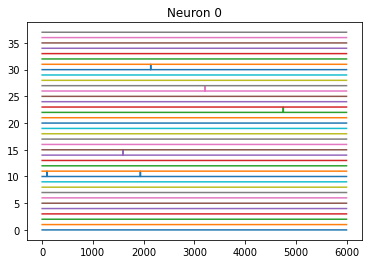

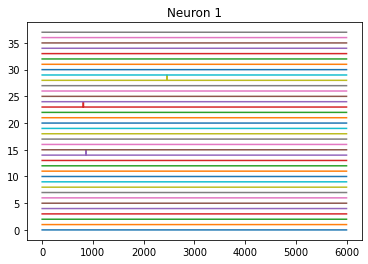

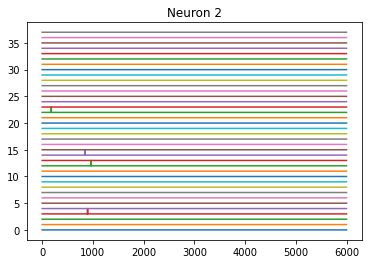

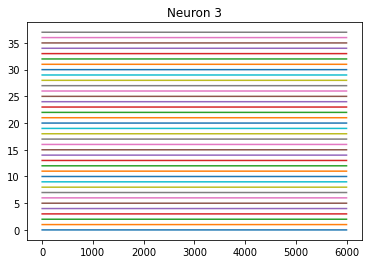

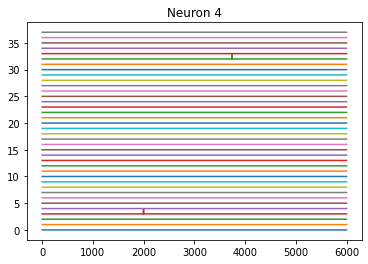

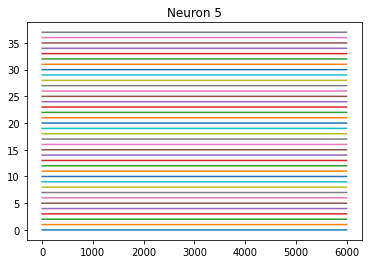

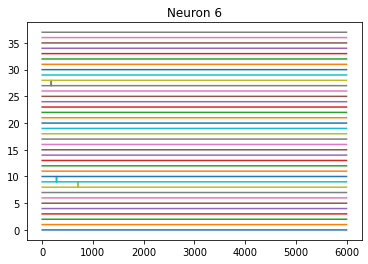

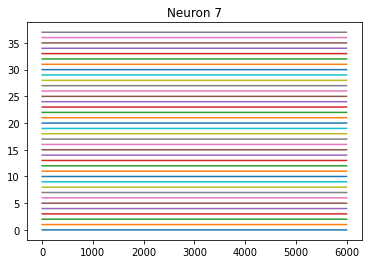

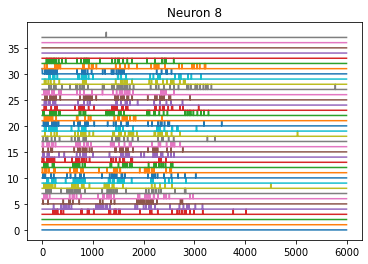

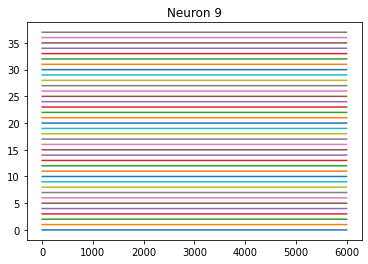

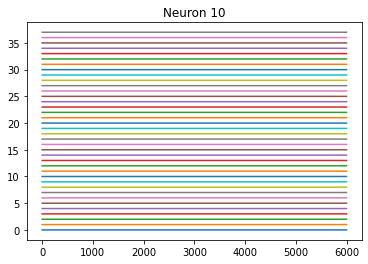

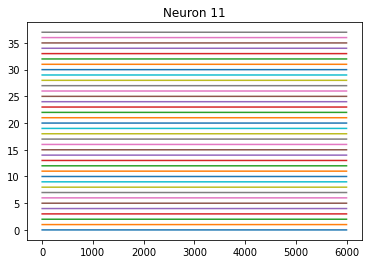

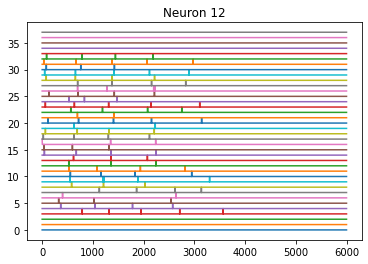

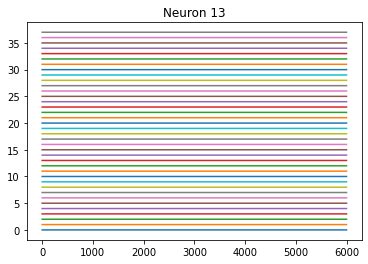

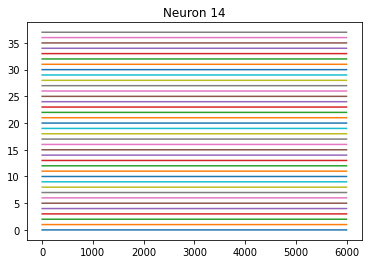

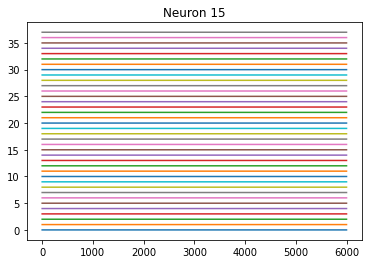

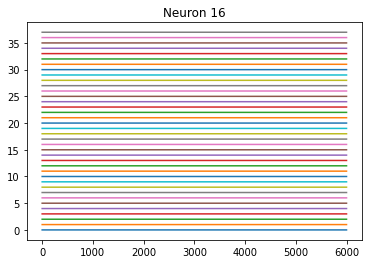

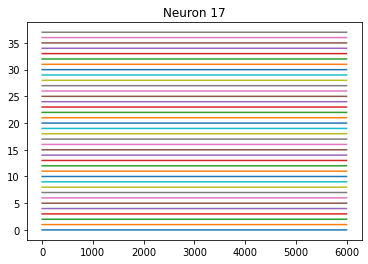

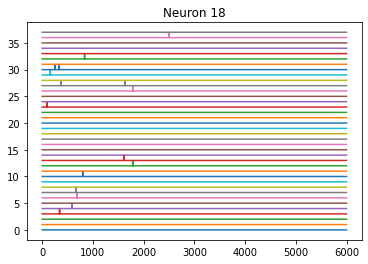

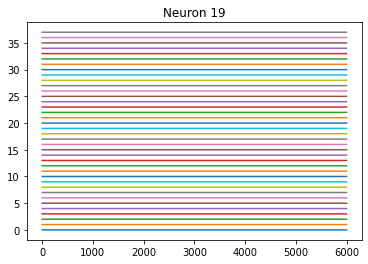

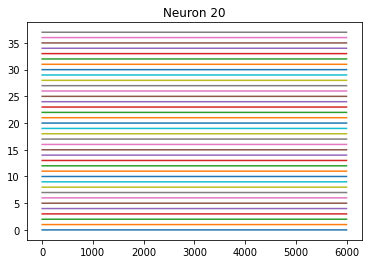

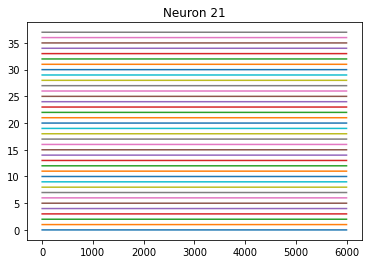

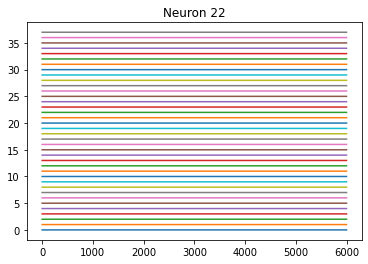

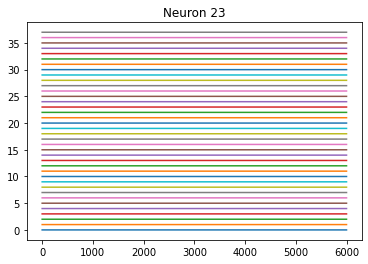

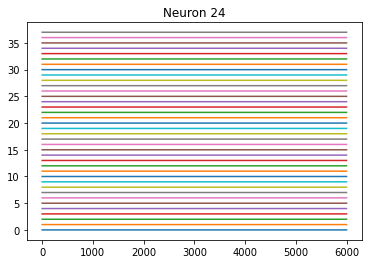

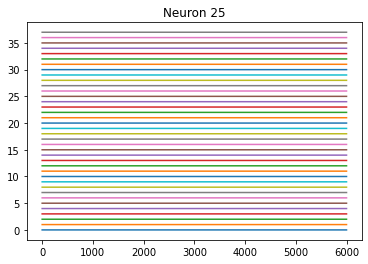

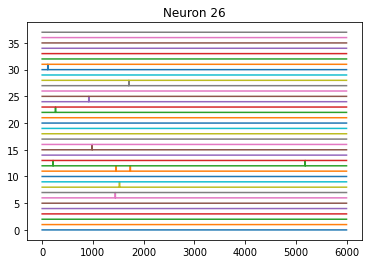

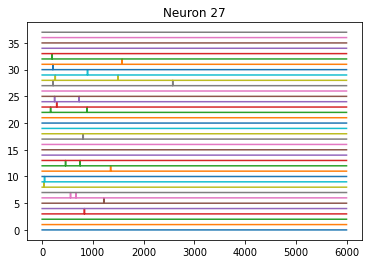

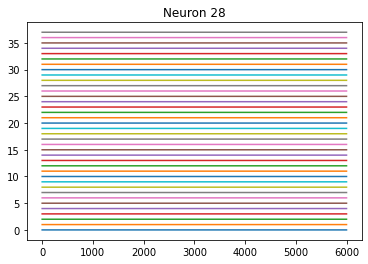

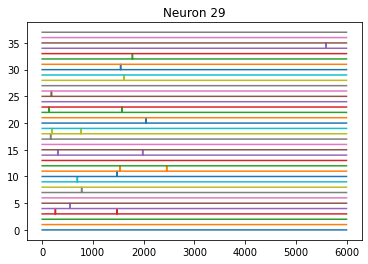

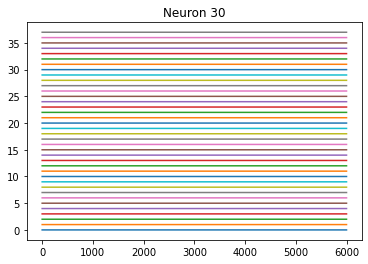

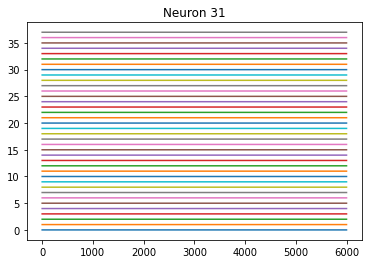

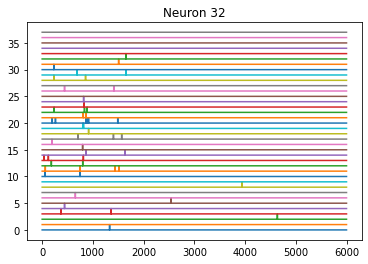

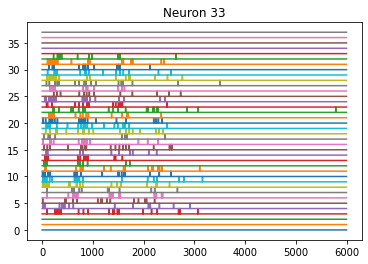

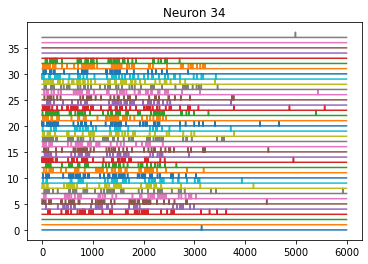

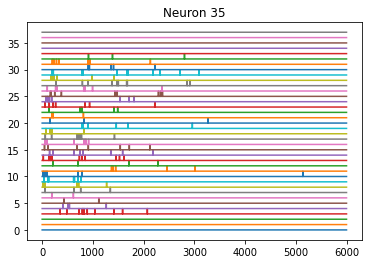

In [486]:
st = 8000
en = 14000
for j in range(q_data.shape[0]):
    for i in range(q_data.shape[1]):
        plt.plot(np.arange(q_data[j,i,st:en].shape[0]) ,q_data[j,i,st:en] + i)
    plt.title('Neuron {}'.format(j))
    plt.show()
    
# plt.plot(q_data[0,:,st:en])

In [216]:
%matplotlib inline

# Now we gaussian blur the data

In [487]:
b = gaussian_filter1d(q_data,10,-1)*10


<IPython.core.display.Javascript object>


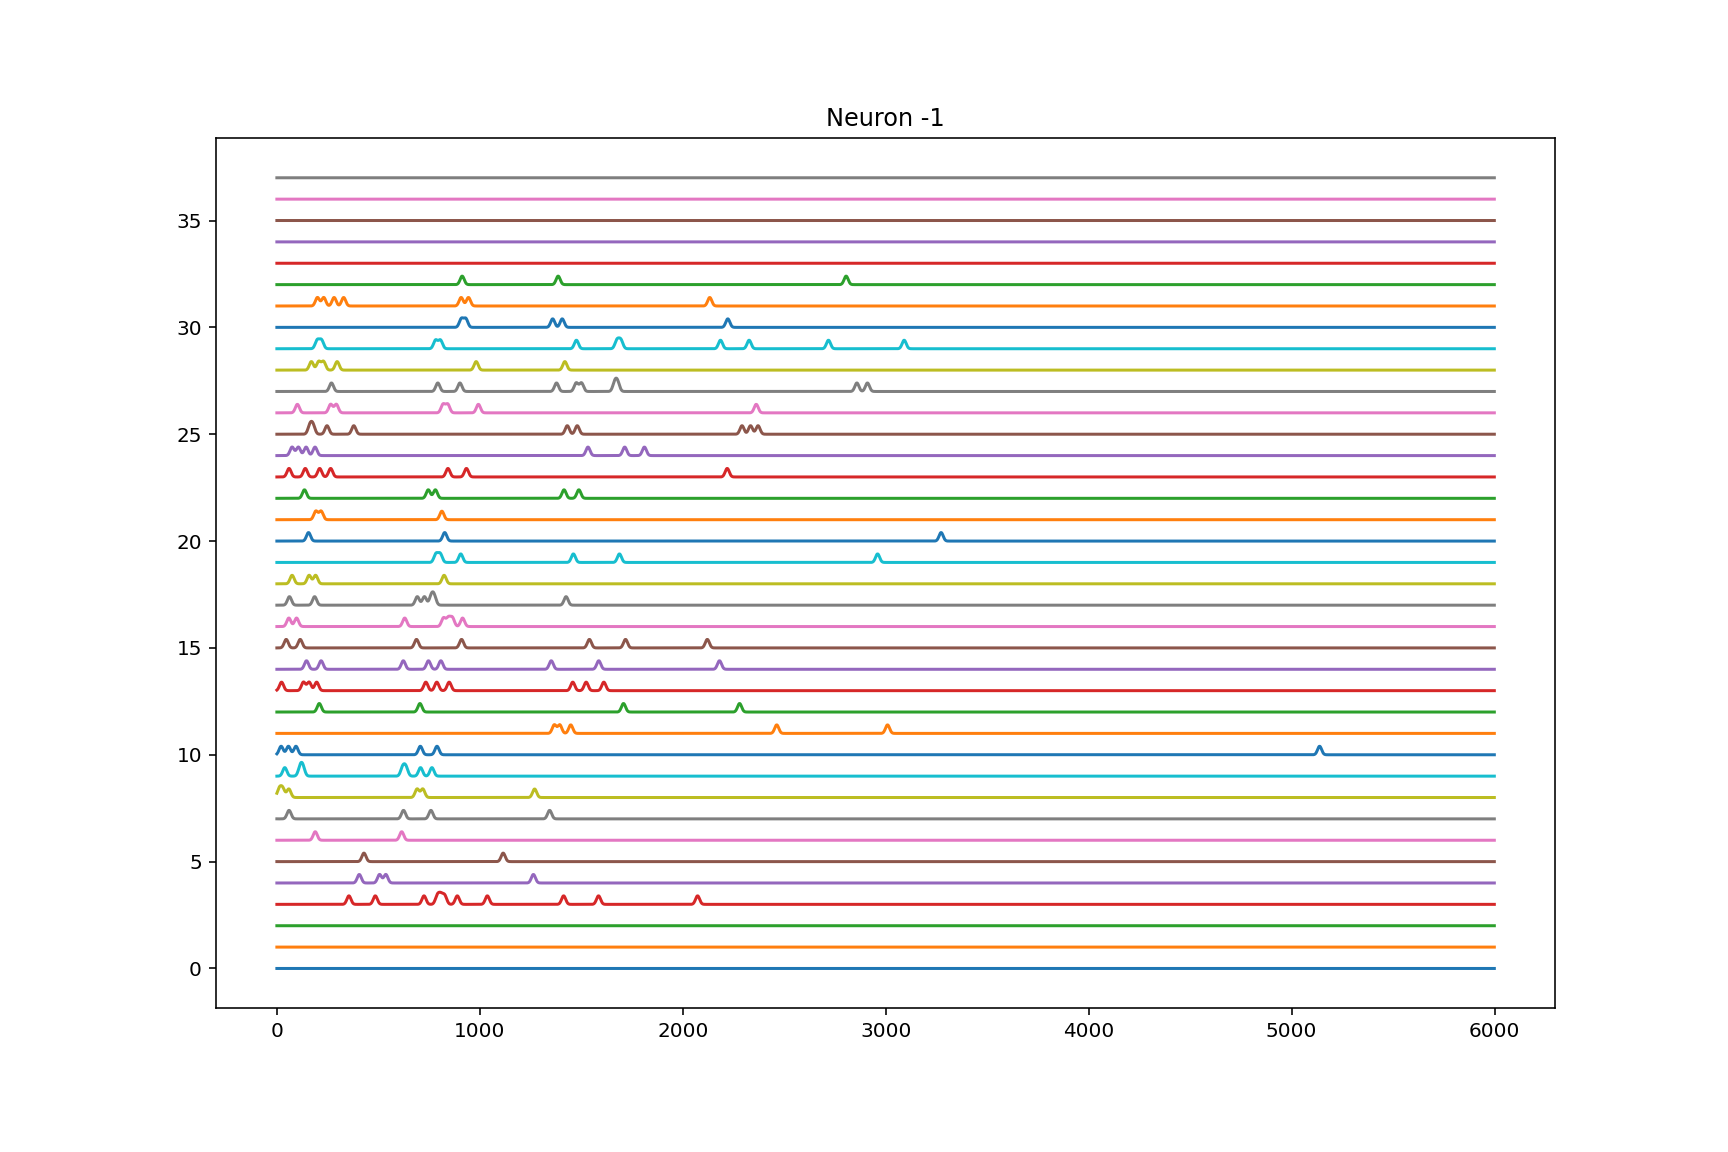

Text(0.5, 1.0, 'Neuron -1')

In [488]:
%matplotlib notebook
for i in range(q_data.shape[1]):
    plt.plot(np.arange(b[-1,i,st:en].shape[0]) ,b[-1,i,st:en] + i)
plt.title('Neuron {}'.format(-1))

## TCA only on stimulation period + 5 seconds

In [490]:
stim_st = 8000
stim_en = 14000
data_to_fit = b[:,:,stim_st:stim_en]

Rank-3 models:  min obj, 0.78;  max obj, 0.78;  time to fit, 7.6s


Rank-4 models:  min obj, 0.77;  max obj, 0.77;  time to fit, 14.0s


Rank-5 models:  min obj, 0.76;  max obj, 0.76;  time to fit, 13.9s


Rank-6 models:  min obj, 0.75;  max obj, 0.75;  time to fit, 16.3s


Rank-7 models:  min obj, 0.74;  max obj, 0.74;  time to fit, 17.2s


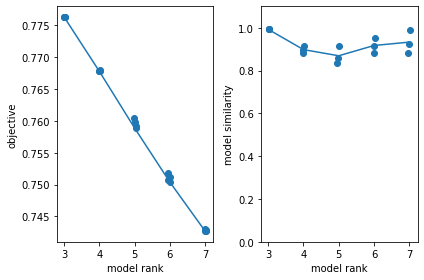

In [495]:


# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data_to_fit, ranks=range(3,8), replicates=4)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()



In [496]:
%matplotlib inline

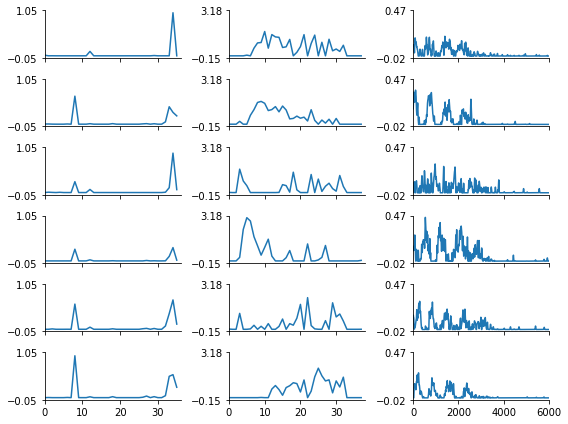

In [497]:
num_components = 6
replicate = 2
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

In [498]:
num_components = 3
replicate = 0
facts = ensemble.factors(num_components)[replicate]

# Plotting Time Factors

In [499]:
%matplotlib inline

Text(0, 0.5, 'Amplitude')

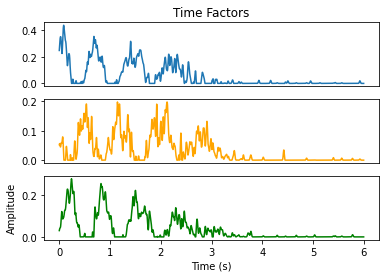

In [500]:
ax = plt.subplot(3, 1, 1, title="Time Factors")
ax.plot(facts[2][:,0])
ax.set_xticks([])

ax1 = plt.subplot(3, 1, 2, title="")
ax1.plot(facts[2][:,1],c='orange')
ax1.set_xticks([])

ax2 = plt.subplot(3, 1, 3, title="")
ax2.plot(np.arange(facts[2][:,2].shape[0])/1000,facts[2][:,2],c='green')

ax2.set_xlabel
# plt.legend(['F1','F2','F3'])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plotting Neural Factors

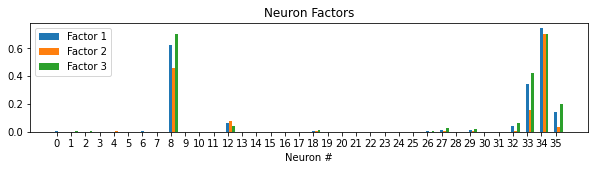

In [501]:
fig,ax = plt.subplots(1,1,figsize=(10,2))
n_ind = np.arange(facts[0].shape[0])
width = 0.2

for lat_ind in range(facts[0].shape[1]):
    
    plt.bar(n_ind + lat_ind*width, facts[0][:,lat_ind],width,label="Comp:{}".format(lat_ind))
ax.set_xticks(np.arange(0,facts[0].shape[0]))
plt.title("Neuron Factors")
ax.set_xlabel("Neuron #")
plt.legend(['Factor 1','Factor 2','Factor 3'])

Text(0.5, 0, 'Neuron #')

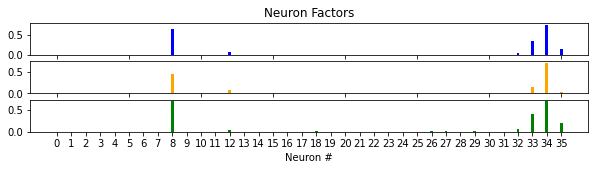

In [517]:
fig,ax = plt.subplots(3,1,figsize=(10,2))
n_ind = np.arange(facts[0].shape[0])
width = 0.2

for lat_ind in range(facts[0].shape[1]):
    if lat_ind == 0:
        c = 'blue'
    if lat_ind == 1:
        c = 'orange'
    if lat_ind == 2:
        c = 'green'
    ax[lat_ind].bar(n_ind , facts[0][:,lat_ind],width,color=c,label="Comp:{}".format(lat_ind))
ax[2].set_xticks(np.arange(0,facts[0].shape[0]))
ax[0].set_title("Neuron Factors")
ax[2].set_xlabel("Neuron #")
# plt.legend(['Factor 1','Factor 2','Factor 3'])

# Plotting experimental factors

Text(0, 0.5, 'Amplitude')

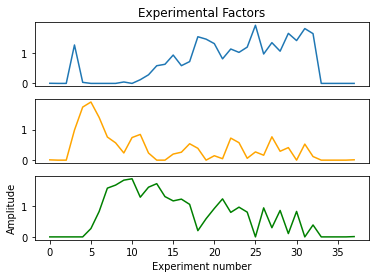

In [481]:
ax = plt.subplot(3, 1, 1, title="Experimental Factors")
ax.plot(facts[1][:,0])
ax.set_xticks([])

ax1 = plt.subplot(3, 1, 2, title="")
ax1.plot(facts[1][:,1],c='orange')
ax1.set_xticks([])

ax2 = plt.subplot(3, 1, 3, title="")
ax2.plot(facts[1][:,2],c='green')

ax2.set_xlabel
# plt.legend(['F1','F2','F3'])
plt.xlabel('Experiment number')
plt.ylabel('Amplitude')

# Reduce neurons to 3 dimensions

In [382]:
fact_num = 0

fact = facts[fact_num]
print(fact.shape)
print(data_to_fit.shape)

(36, 3)
(36, 38, 6000)


In [387]:
d = np.rollaxis(np.stack([np.matmul(b.T, fact).T for b in np.rollaxis(data_to_fit,1,0)]),1,0)
print(d.shape)

(3, 38, 6000)


## Plot in 3d

In [389]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

Text(0.5, 0, 'Factor 3')

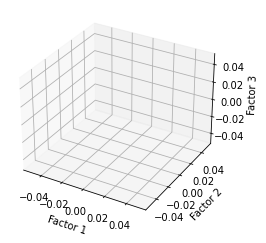

In [435]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
st = 0
en = -1

for i in [35]:
    
    ax.plot(d[0,i,st:en], d[1,i,st:en],d[2,i,st:en],alpha=.5)

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_zlabel('Factor 3')

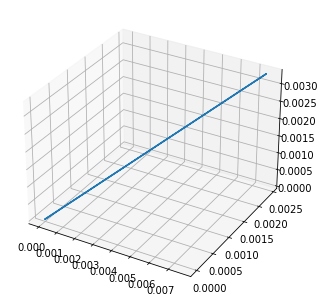

In [434]:
data.shape
d.shape
%matplotlib inline

fig = plt.figure()
ax = p3.Axes3D(fig)
line, = ax.plot(d[0,34, :], d[1,34, :], d[2,34, :])
plt.show()

In [418]:
%matplotlib notebook

In [423]:
data

101

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure()
ax = p3.Axes3D(fig)

# neur_ind = np.random.randint(d.shape[1],size=5)
neur_ind = [8,31,32,33,34,35]


def update(num, data, line_arr,neur_ind):
    for i, ind in enumerate(neur_ind):
        
        line_arr[i].set_data(data[:2,ind, :num])
        line_arr[i].set_3d_properties(data[2,ind, :num])

N= d.shape[2]

line_arr = []

for i in neur_ind:
    line, = ax.plot(d[0,i, 0:1], d[1,i, 0:1], d[2,i, 0:1])
    line_arr.append(line)

# Setting the axes properties
ax.set_xlim3d([-.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(d, line_arr,neur_ind), interval=1, blit=False,repeat_delay=3000)
ani.save('imp_neurons3.gif', writer='imagemagick')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


In [263]:
from scipy import fft,ifft

In [332]:
y = fft(facts[2],axis=0)
T = 1/fs
N = y.shape[0]
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

print(y.shape)

(6000, 3)


<ipython-input-332-eca540985f1c>:1: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  y = fft(facts[2],axis=0)


(-1.0, 400.0)

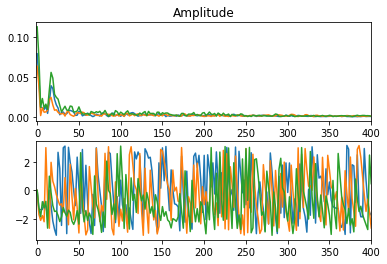

In [344]:
ax = plt.subplot(2, 1, 1, title="Amplitude")
ax.plot(xf,2.0/N * np.abs(y[0:N//2,:]))
ax.set_xlim([-1,400])

phi = np.angle(y)

ax2 = plt.subplot(2, 1, 2, title="")
ax2.plot(xf,phi[0:N//2,:])
ax2.set_xlim([-1,400])

In [329]:
y = facts[2][:,0]

In [330]:
S = np.fft.fftshift(np.fft.fft(y / y.shape[0]))
f_scale = np.linspace(-1, 1,y.shape[0]) * (fs / 2)

a = np.abs(S)
phi = np.angle(S)

(0.0, 300.0)

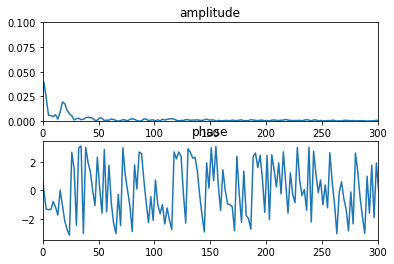

In [331]:
ax = plt.subplot(2, 1, 1, title="amplitude")
ax.plot(f_scale, a)
ax.set_ylim([0,.1])
ax.set_xlim([0,300])

ax2 = plt.subplot(2, 1, 2, title="phase")
ax2.plot(f_scale, phi)
# ax2.set_ylim([0,.1])
ax2.set_xlim([0,300])
# plt.axes([0,6000,0,.02])